# EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tools import plot_mean_profile, plot_random_series

In [2]:
target = pd.read_csv('data/target_train.csv')
data = pd.read_csv('data/data.csv')

In [3]:
data

,Unnamed: 0,id,time,ch0,ch1,ch2
0,0,1_1,0,372.271894,350.219643,408.527289
1,1,1_1,1,373.393195,349.845876,411.143658
2,2,1_1,2,371.898127,350.219643,412.638726
3,3,1_1,3,371.898127,350.967177,413.386260
4,4,1_1,4,371.898127,351.340944,414.133794
...,...,...,...,...,...,...
587995,2395,210_2,2395,321.439587,262.384407,393.202844
587996,2396,210_2,2396,320.318286,254.535301,390.960242
587997,2397,210_2,2397,320.692053,248.928797,386.475039
587998,2398,210_2,2398,318.823218,242.200991,383.858670


In [4]:
data.columns = data.columns.str.strip()
target.columns = target.columns.str.strip()


target['class'] = target['target'].map({'ID': 0, 'OD': 1})

merged = data.merge(target[['id', 'class']], on='id', how='left')

train_data = merged[merged['class'].notna()].copy()
test_data = merged[merged['class'].isna()].copy()

train_data['class'] = train_data['class'].astype(int)

print(f'Размер train_data: {train_data.shape}')
print(f'Размер test_data: {test_data.shape}')

Размер train_data: (240000, 7)
Размер test_data: (348000, 7)


In [5]:
train_data

,Unnamed: 0,id,time,ch0,ch1,ch2,class
0,0,1_1,0,372.271894,350.219643,408.527289,1
1,1,1_1,1,373.393195,349.845876,411.143658,1
2,2,1_1,2,371.898127,350.219643,412.638726,1
3,3,1_1,3,371.898127,350.967177,413.386260,1
4,4,1_1,4,371.898127,351.340944,414.133794,1
...,...,...,...,...,...,...,...
585595,2395,209_2,2395,410.769891,366.291623,420.114065,0
585596,2396,209_2,2396,408.527289,368.534224,422.356667,0
585597,2397,209_2,2397,408.153522,367.786690,421.982900,0
585598,2398,209_2,2398,413.386260,362.553953,421.609133,0


In [6]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [7]:
print("Размер train_data:", train_data.shape)
print("\nПример train_data:")
display(train_data.head())

Размер train_data: (240000, 7)

Пример train_data:


,Unnamed: 0,id,time,ch0,ch1,ch2,class
0,0,1_1,0,372.271894,350.219643,408.527289,1
1,1,1_1,1,373.393195,349.845876,411.143658,1
2,2,1_1,2,371.898127,350.219643,412.638726,1
3,3,1_1,3,371.898127,350.967177,413.386260,1
4,4,1_1,4,371.898127,351.340944,414.133794,1


In [8]:
print("\nКоличество уникальных id:", train_data['id'].nunique())


Количество уникальных id: 100


In [9]:
class_counts = train_data.groupby('id')['class'].first().value_counts()
print("\nРаспределение классов (по id):")
print(class_counts)


Распределение классов (по id):
class
1    64
0    36
Name: count, dtype: int64


In [10]:
series_lengths = train_data.groupby('id').size()
print("\nСтатистика длин временных рядов:")
print(series_lengths.describe())


Статистика длин временных рядов:
count     100.0
mean     2400.0
std         0.0
min      2400.0
25%      2400.0
50%      2400.0
75%      2400.0
max      2400.0
dtype: float64



Статистика канала ch0:
count    240000.000000
mean        373.682740
std         143.313298
min       -6481.866652
25%         360.685118
50%         373.019428
75%         383.858670
max        3605.729881
Name: ch0, dtype: float64

Статистика канала ch1:
count    240000.000000
mean        334.043632
std         106.745159
min       -6481.866652
25%         328.541159
50%         352.088478
75%         365.170322
max         686.609909
Name: ch1, dtype: float64

Статистика канала ch2:
count    240000.000000
mean        414.917580
std         102.113941
min        -251.545165
25%         382.363602
50%         394.324145
75%         417.871463
max        3605.729881
Name: ch2, dtype: float64


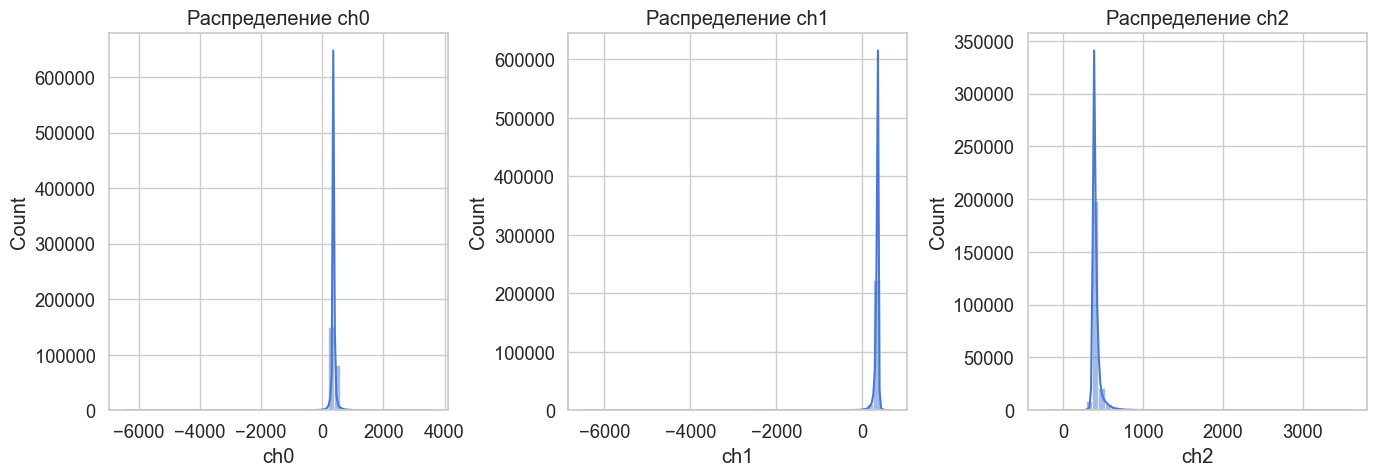

In [11]:
channels = ['ch0', 'ch1', 'ch2']

for ch in channels:
    print(f'\nСтатистика канала {ch}:')
    print(train_data[ch].describe())

plt.figure(figsize=(14,5))
for idx, ch in enumerate(channels, 1):
    plt.subplot(1, 3, idx)
    sns.histplot(train_data[ch], bins=50, kde=True)
    plt.title(f'Распределение {ch}')
plt.tight_layout()
plt.show()


Примеры временных рядов для класса 0 (ID):


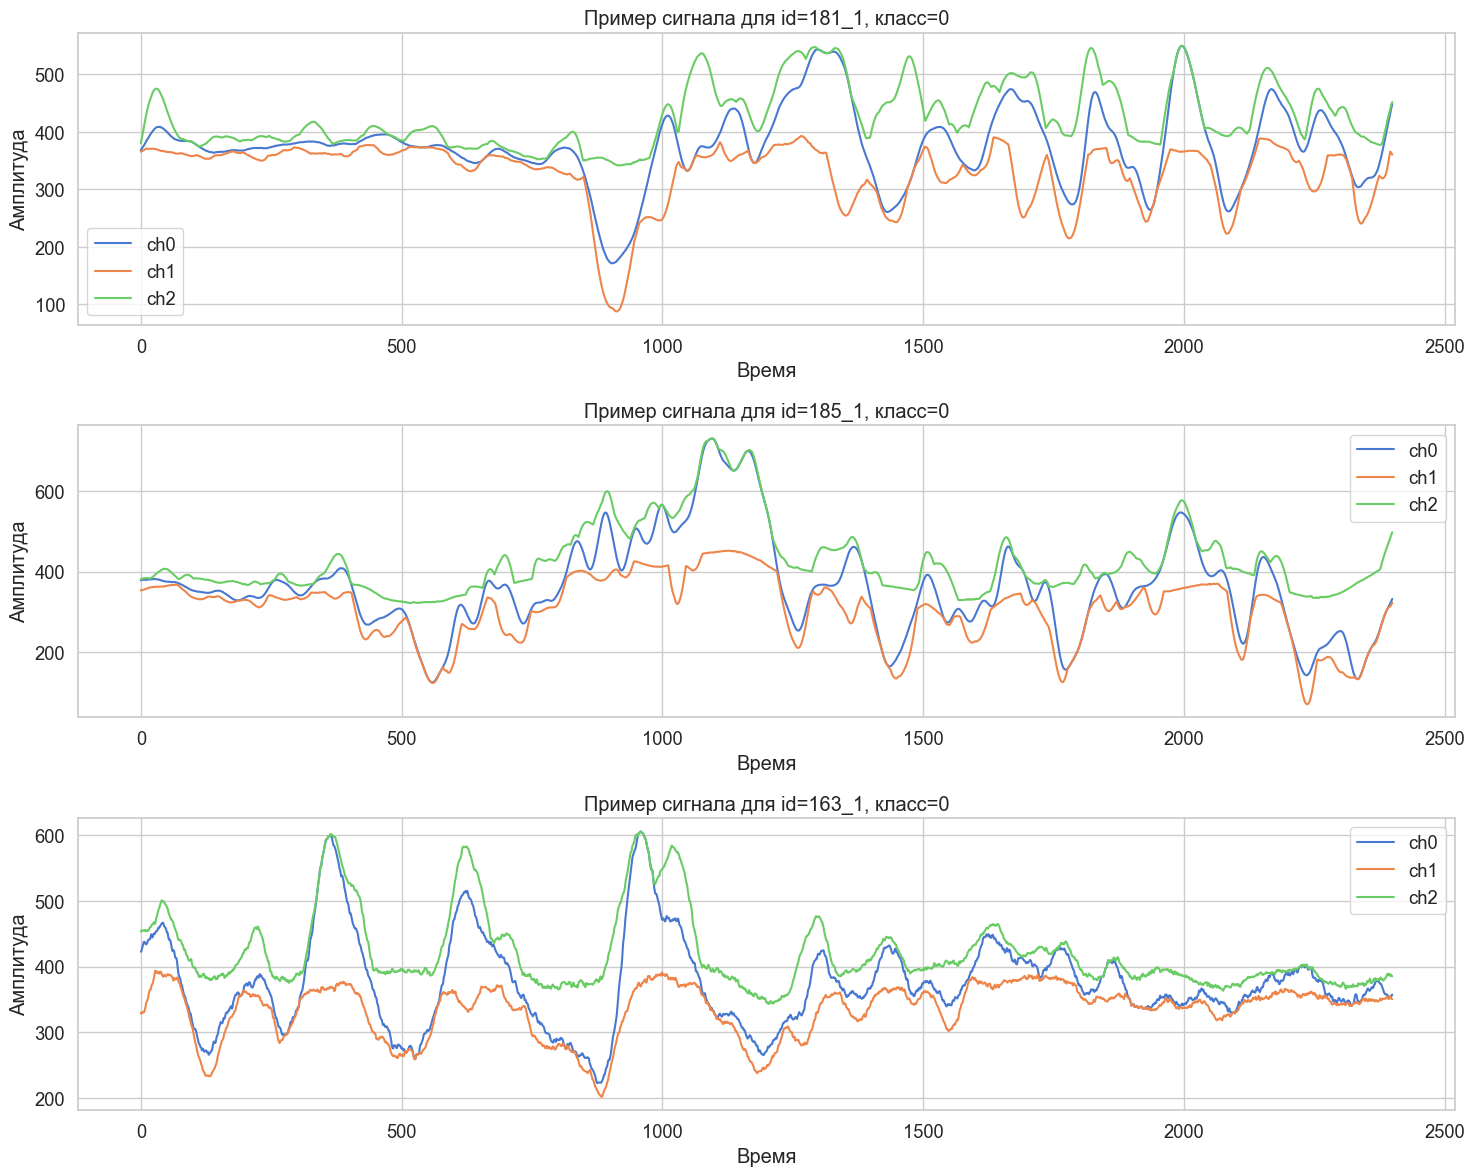

In [12]:
print("\nПримеры временных рядов для класса 0 (ID):")
plot_random_series(train_data, label=0)


Примеры временных рядов для класса 1 (OD):


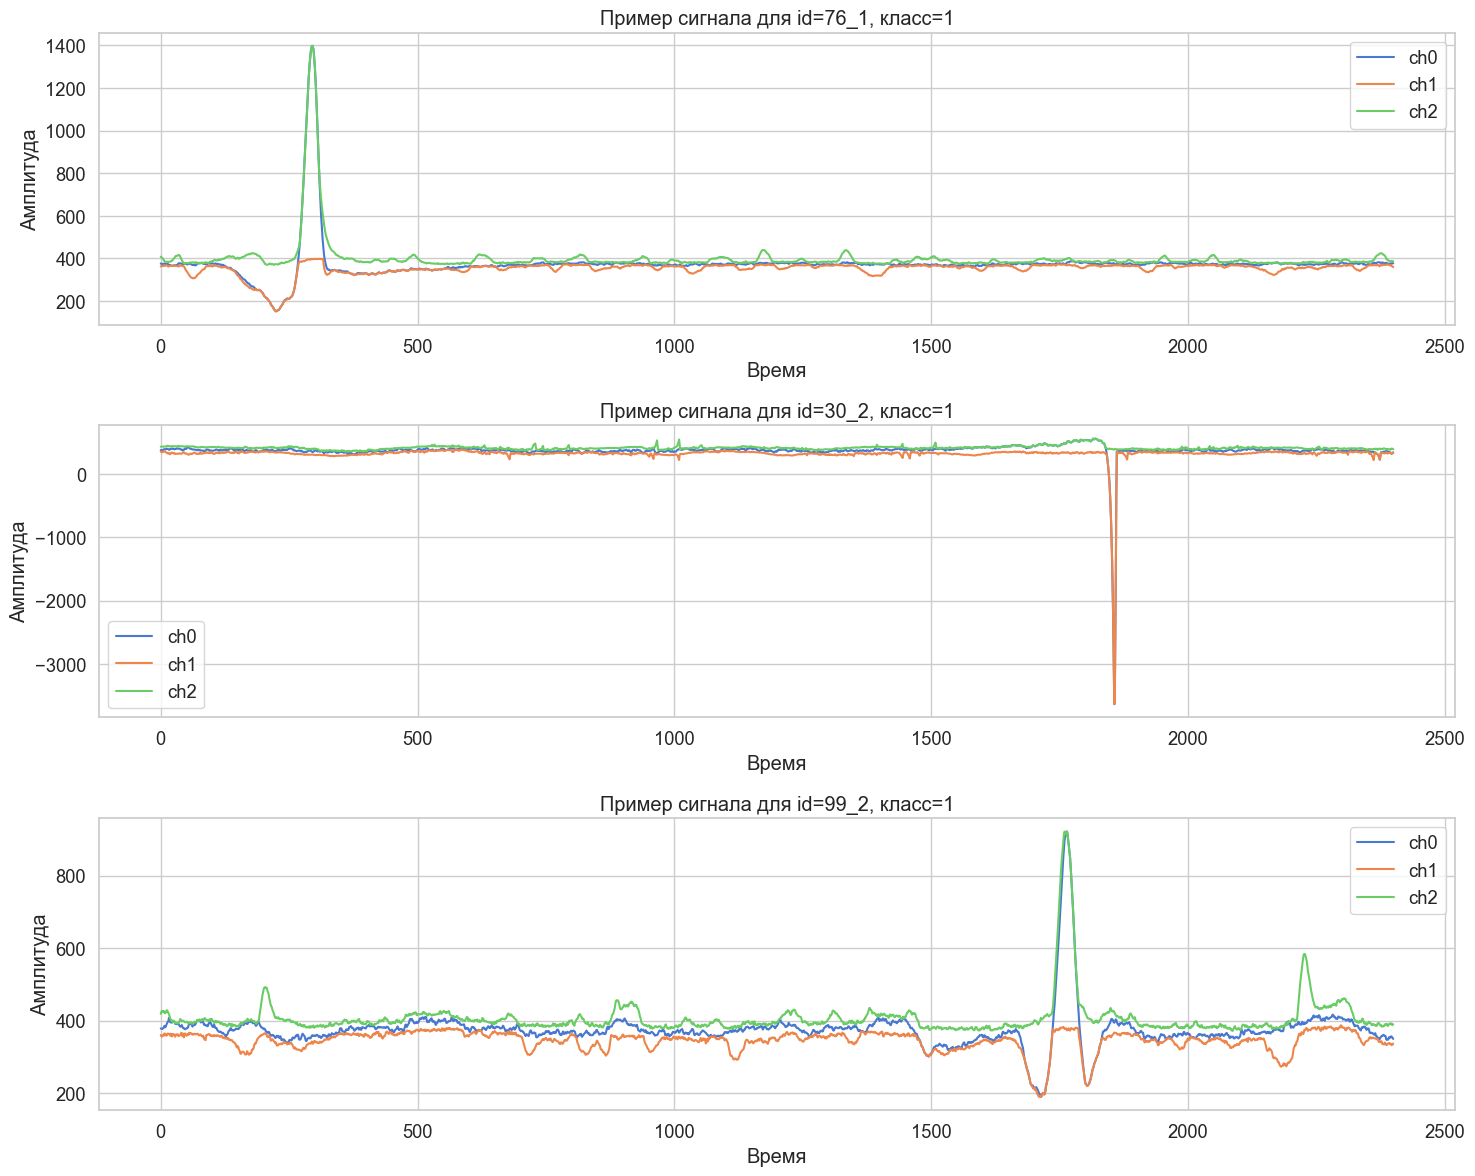

In [13]:
print("\nПримеры временных рядов для класса 1 (OD):")
plot_random_series(train_data, label=1)


Средние профили для класса 0 (ID):


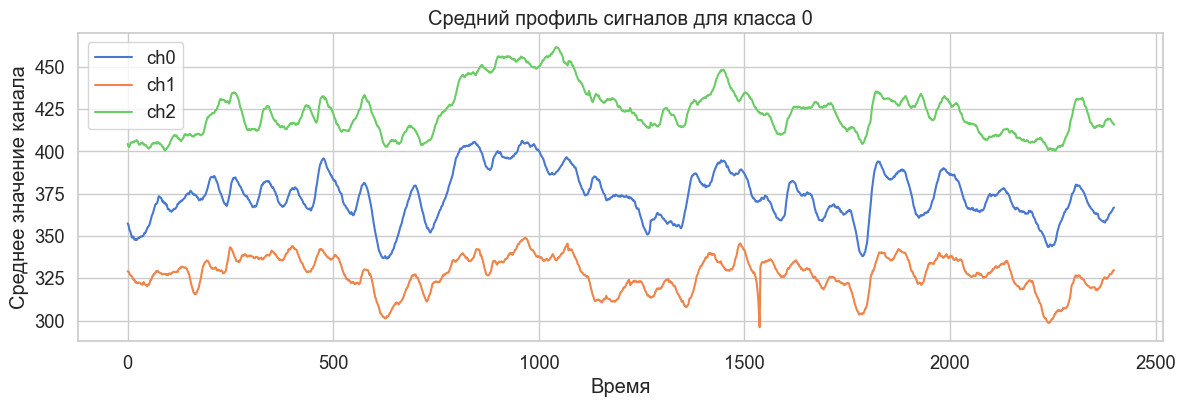

In [14]:
print("\nСредние профили для класса 0 (ID):")
plot_mean_profile(train_data, label=0,channels=channels)


Средние профили для класса 1 (OD):


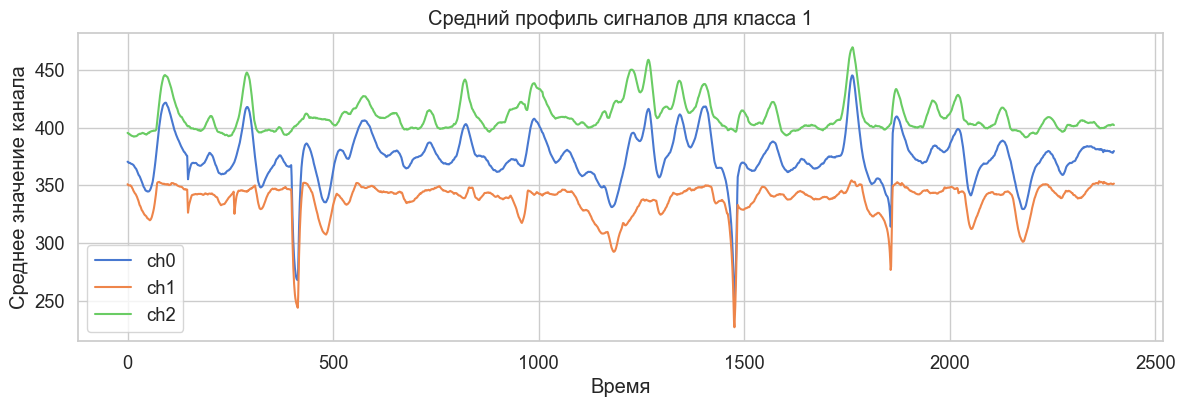

In [15]:
print("\nСредние профили для класса 1 (OD):")
plot_mean_profile(train_data, label=1,channels=channels)

# Результаты первичного анализа

1) Имеются трёхканальные временные ряды (ch0, ch1, ch2) для каждого дефекта трубы. Для части рядов определен класс дефекта, для остальных потребуется их классифицировать.
2) Наблюдается умеренный дисбаланс классов  ~ 1/3 и 2/3. F1-score будет хорошо отображать качество модели.
3) Судя по тому, что числовые ряды имеют дискретный отсчет по времени и одинаковые длины, возникает предположение что ось time на самом деле является пространственной мерой (координата вдоль трубы). Судя по всему было использовано некое физическое поле, которое дало картину в трехмерном пространстве о состоянии трубы. 
4) У рядов класса OD (наружные дефекты) наблюдается более "яркий" выброс на датчиках, с более мощной амплитудой. У рядов класса ID (внутренние дефекты) наблюдается более "приглушенный" сигнал. Предполагается, что было внешнее сканирование, а не внутренние датчики. 

5) Так как длины временных рядов одинаковые, можно работать в стиле классической классификации временных рядов. 

# План работы
1) Извлеч статистические признаки: среднее значение, cтандартное отклонение,
                                    минимум и максимум, диапазон амплитуд,
                                    скос и эксцесс распределения сигнала, энергию сигнала. 
2) Извлеч пики и впадины.
3) Применить FFT и взять первые несколько коэффициентов для каждого канала.
4) Обучить Catboost на извлеченных признаках.



# Classification problem

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from feature_extraction import build_features
from tools import  predict_cv
from sklearn.model_selection import StratifiedKFold

In [17]:
features = build_features(train_data)

print(features.shape)
features.head()

(100, 46)


,id,ch0_mean,ch0_std,ch0_min,ch0_max,ch0_range,ch0_skew,ch0_kurtosis,ch0_energy,ch0_n_peaks,...,ch2_skew,ch2_kurtosis,ch2_energy,ch2_n_peaks,ch2_n_valleys,ch2_fft_1,ch2_fft_2,ch2_fft_3,ch2_fft_4,ch2_fft_5
0,102_2,372.850766,116.759799,-10.091708,1570.942541,1581.034249,6.832395,61.516545,3.663613e+08,344,...,8.697723,79.433628,4.142530e+08,467,467,34869.313959,34701.527261,34780.857257,37359.051383,33197.172371
1,103_1,373.551423,58.242995,146.516649,930.305968,783.789319,4.625389,38.271735,3.430390e+08,332,...,6.121597,49.651535,4.044015e+08,364,365,15036.033021,16387.390730,13156.936104,17120.230461,11581.581317
2,104_2,373.119566,120.089100,-436.933578,1593.742325,2030.675904,4.131952,53.630168,3.687350e+08,302,...,8.730558,87.577513,4.452984e+08,323,323,25789.106310,18101.960757,24724.801450,30223.084417,23493.750855
3,105_1,374.789526,76.088450,217.906139,1107.097741,889.191602,5.840345,46.208529,3.510159e+08,290,...,6.619840,55.353269,4.302572e+08,318,318,10191.625308,21148.001683,10661.545226,20107.937661,16190.225780
4,106_1,373.765404,77.737389,69.894422,1226.329402,1156.434980,6.622189,65.452991,3.497848e+08,319,...,7.413304,69.961526,4.231091e+08,354,354,14882.483400,11741.335373,14150.384169,19772.117788,20669.400723


In [18]:
X = features.drop(columns=['id'])
y = train_data[['id', 'class']].drop_duplicates()['class'].values

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
models = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold+1}/{5}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42 + fold,
        eval_metric='F1',
        early_stopping_rounds=50,
        verbose=100
    )
    
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        use_best_model=True
    )
    
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1-score: {f1:.4f}")
    models.append(model)
    
print(f"\nСредний F1-score на {5} фолдах: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Fold 1/5
0:	learn: 0.8245614	test: 0.6666667	best: 0.6666667 (0)	total: 149ms	remaining: 2m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7407407407
bestIteration = 2

Shrink model to first 3 iterations.
Fold 1 F1-score: 0.7407

Fold 2/5
0:	learn: 0.8301887	test: 0.7692308	best: 0.7692308 (0)	total: 1.94ms	remaining: 1.93s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8965517241
bestIteration = 24

Shrink model to first 25 iterations.
Fold 2 F1-score: 0.8966

Fold 3/5
0:	learn: 0.8727273	test: 0.6923077	best: 0.6923077 (0)	total: 1.8ms	remaining: 1.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8275862069
bestIteration = 34

Shrink model to first 35 iterations.
Fold 3 F1-score: 0.8276

Fold 4/5
0:	learn: 0.8400000	test: 0.6086957	best: 0.6086957 (0)	total: 1.75ms	remaining: 1.75s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8275862069
bestIteration = 21

Shrink model to first 22 iterations.


In [20]:
features_test = build_features(test_data) 
predicted_test = pd.DataFrame(features_test['id'])
X_test = features_test.drop(columns=['id'])
y_test_pred = predict_cv(models, X_test)
predicted_test["class"] = pd.Series(y_test_pred)
predicted_test

,id,class
0,100_1,1
1,100_2,1
2,101_1,0
3,101_2,0
4,102_1,1
...,...,...
140,97_2,1
141,98_1,0
142,99_1,0
143,9_1,1


# Clastering
Идея решения:
1) Трансформировать временные ряды через Фурье-преобразование,
2) Понизили размерность с помощью UMAP
3) выделили N устойчивых кластеров через метод локтя и метод силуэта

In [21]:
from sklearn.cluster import KMeans
import umap
from tools import fourier_transform_features
from sklearn.metrics import silhouette_score

In [22]:
ids, fft_features, original_series = fourier_transform_features(data, n_freq=50)

reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
fft_features_umap = reducer.fit_transform(fft_features)

e:\Study data\Schlumberger\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Study data\Schlumberger\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


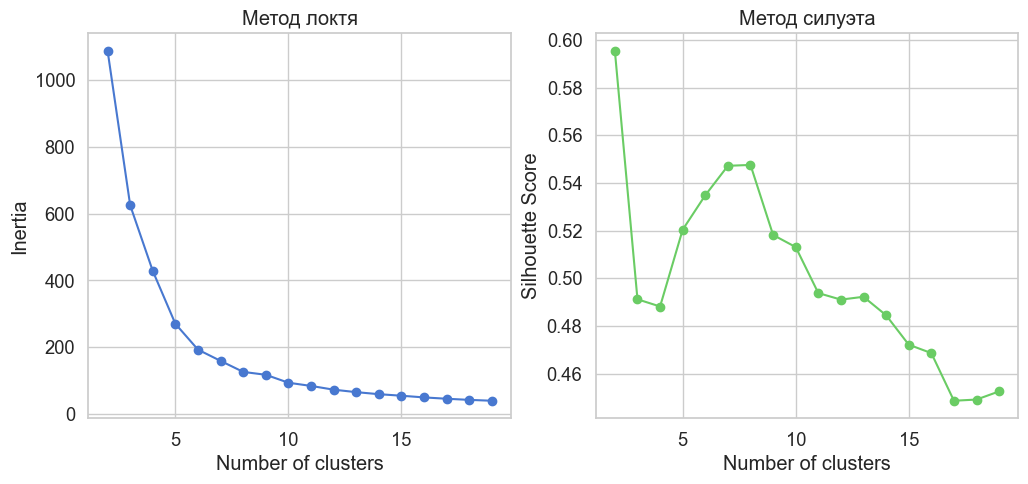

In [23]:
inertias = []
silhouettes = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(fft_features_umap)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(fft_features_umap, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Метод локтя')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Метод силуэта')

plt.show()

По графикам оптимальное число кластеров ~ 6

In [24]:
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(fft_features_umap)
centroids = kmeans.cluster_centers_

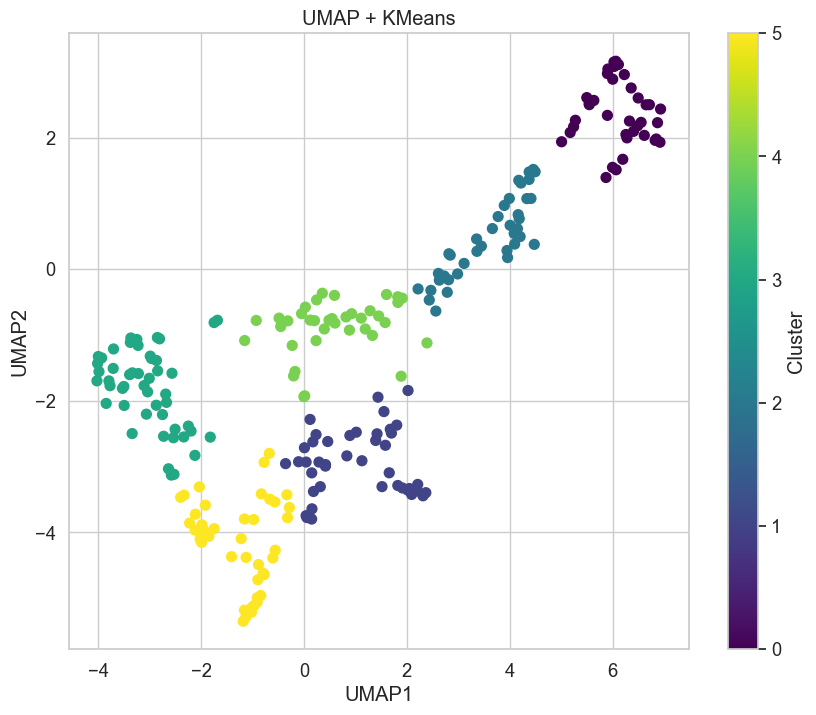

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(fft_features_umap[:, 0], fft_features_umap[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('UMAP + KMeans')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)
plt.show()

clustered_df = pd.DataFrame({'id': ids, 'cluster': cluster_labels})

In [ ]:
typical_representatives = []
from scipy.spatial.distance import cdist
for cluster_id in range(6):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_points = fft_features_umap[cluster_indices]
    distances = cdist(cluster_points, centroids[cluster_id].reshape(1, -1))
    closest_index_in_cluster = cluster_indices[np.argmin(distances)]
    typical_representatives.append(closest_index_in_cluster)

print("Индексы типичных представителей:", np.array(typical_representatives))

Индексы типичных представителей: [236 175  58 102 159 237]


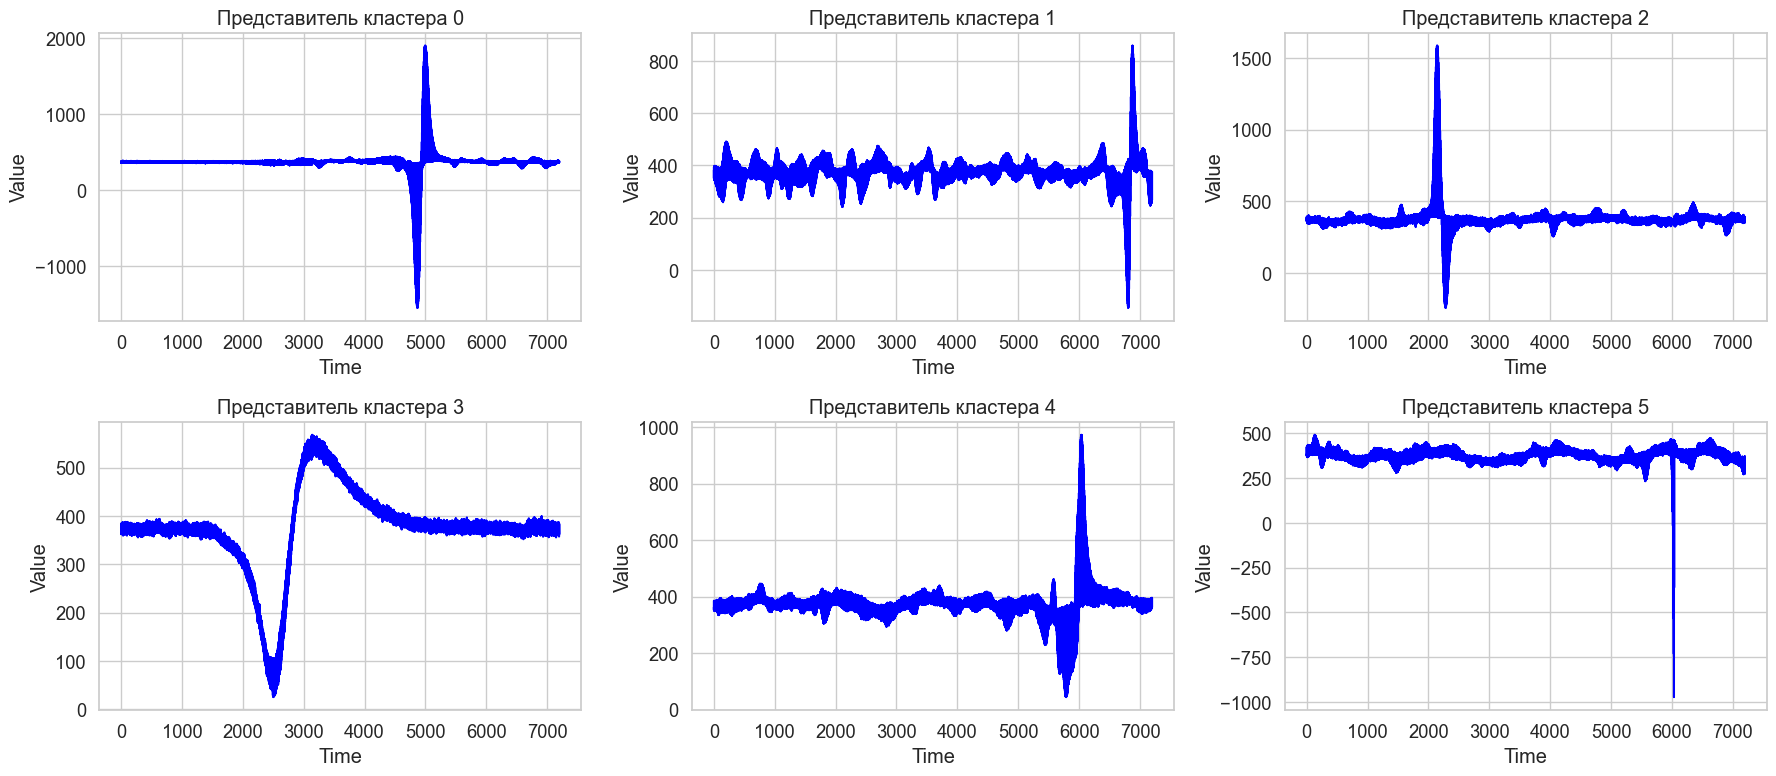

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, idx in enumerate(typical_representatives):
    axes[i].plot(original_series[idx], color='blue')
    axes[i].set_title(f'Представитель кластера {i}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()